In [22]:
#This is an explicit coding of KNN without using Scikit learn
#Significantly slower than SKlearn due to multithreading in SciKit Learn

In [23]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')

In [24]:
#Sample plots for computing basic mean distance
plot1 = [1,3]
plot2 = [2,5]

In [25]:
#Euclidean distance for two points
euclidean_distance = sqrt ( (plot1[0] - plot2[0]) **2 + (plot1[1] - plot2[1]) ** 2 )

In [26]:
print(euclidean_distance)

2.23606797749979


In [27]:
#Create new dataset to demonstrate basic KNN
dataset = {'k':[[1,2], [2,3], [3,1]],
           'r':[[6,5],[7,7],[8,6]]
          }
new_features = [5,7]

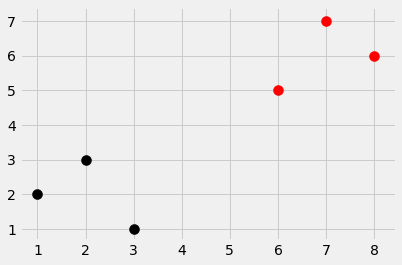

In [28]:
[[plt.scatter(ii[0], ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.show()

In [29]:
#Define KNN algorithm as a function
def k_nearest_neighbors(data,predict, k = 3):
    '''
    data is a list of known datapoints
    predict is the set of points to predict their label
    k is the number of neighbors to use for prediction
    '''
    if(len(data) >= k):
        warnings.warn('K is set to a value less than total voting groups')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

In [30]:
results = k_nearest_neighbors(dataset, new_features, k = 3)
print(results)

('r', 1.0)


In [31]:
#Run KNN for the breast cancer dataset
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace = True)
df.drop(['id'], 1, inplace = True)
full_data = df.astype('float').values.tolist()

In [32]:
random.shuffle(full_data)

In [33]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

In [34]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [35]:
#Find accuracy for KNN on the breast cancer dataset using k = 5
#For incorrect votes, print the confidence
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1

print('Accuracy: ', correct/total)

0.6
1.0
0.6
1.0
0.8
Accuracy:  0.9640287769784173
